In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()

In [2]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
m = sp.Symbol('m', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t

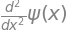

In [3]:
psi(x).diff(x, x)

In [4]:
-k**2 * psi(x)

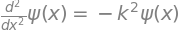

In [5]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [6]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [7]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

In [8]:
#sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
#sol

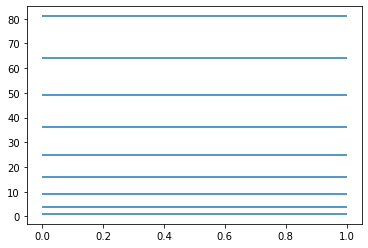

In [9]:
plt.hlines(np.arange(1, 10)**2, 0, 1)

In [10]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [11]:
sol.lhs, sol.rhs

In [12]:
sp.Abs(sol.rhs)**2

In [13]:
sp.integrate((sol.rhs)**2, (x, 0, a))

In [14]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

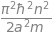

In [15]:
n**2 * sp.pi**2 * h**2 / (2 * m * a**2)

In [16]:
sp.exp(-sp.I * n**2 * sp.pi**2 * h**2 / (2 * m * a**2) * t / h)

In [17]:
Psi = sol.rhs * sp.exp(-sp.I * n**2 * sp.pi**2 * h**2 / (2 * m * a**2) * t / h)
Psi

In [18]:
Psif = lambdify((x, t, n), Psi.subs({h: 1, m: 1, a: 1}))

In [19]:
Psif(0.3, 2.3, 1)

(0.39711826337179823+1.0729930471683002j)

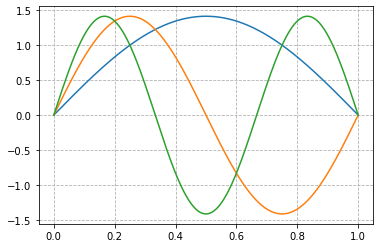

In [20]:
xs = np.linspace(0, 1, 1000)

plt.grid(linestyle = '--')

ys = Psif(xs, 0, 1).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 2).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 3).real
plt.plot(xs, ys)

In [21]:
sol

In [22]:
sol.rhs * x * sol.rhs

In [23]:
sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()

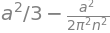

In [24]:
sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()

Zadanie : Policz ile wynosi średni pęd $$<p>=?$$ oraz średni kwadrat pędu $$<p^2>=?$$ w n-tym stanie stacjonarnym. 

In [25]:
s_ped = sp.integrate((sol.rhs) * (sol.rhs).diff(x), (x, 0, a)).simplify()
s_ped

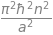

In [26]:
s_ped_kwadrat = (-h ** 2 * sp.integrate((sol.rhs) * (sol.rhs).diff(x, x), (x, 0, a))).simplify();
s_ped_kwadrat

Pytanie : Czy zasada nieoznaczoności jest faktycznie spełniona?

Zasada nieoznaczoności jest spełniona, wynika to z faktu, że wartość średnia kwadratu pędu jest nieoznaczona. 
Oznacza to, że nieznana jest dokładna wartość pędu, natomiast znany jest przedział możliwych wartości.